In [11]:
import numpy as np
from IPython.display import Audio
from matplotlib import pyplot as plt
from helpers.audio_utils import trim_audio
from helpers.path_utils import get_base_dir
from helpers.sam import StudentAuscultationManikin
from helpers.plot import plot_waveform_and_spectrograms, plot_audio_fft

AUDIO_NAME = "Dorita-20240906-1047.wav"
mobile_dir = get_base_dir().joinpath("data", "mobile", "no-trigger", AUDIO_NAME)
stethos_dir = get_base_dir().joinpath("data", "stethos", "no-trigger", AUDIO_NAME)

sam = StudentAuscultationManikin()

mobile_audio, stethos_audio, sample_rate = sam.load_recordings(
    str(mobile_dir), str(stethos_dir)
)
print("Sample rate: ", sample_rate)

Sample rate:  4000


In [12]:
SNIPPET_SECS = 5

mobile_snippet = trim_audio(mobile_audio, sample_rate, end_at=SNIPPET_SECS)
stethos_snippet = trim_audio(stethos_audio, sample_rate, end_at=SNIPPET_SECS)

mobile_audio.shape, mobile_snippet.shape

(torch.Size([1, 214000]), torch.Size([1, 20000]))

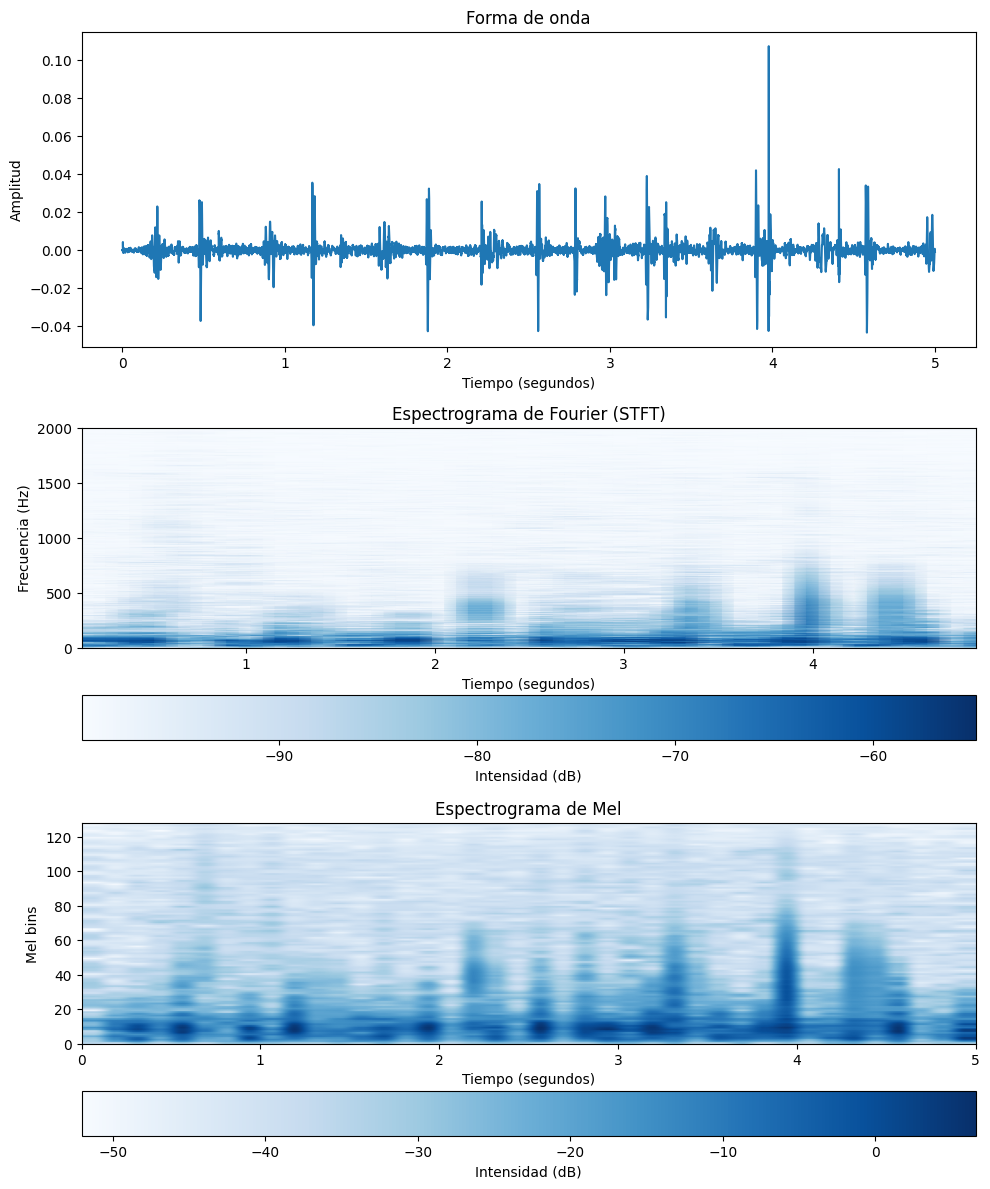

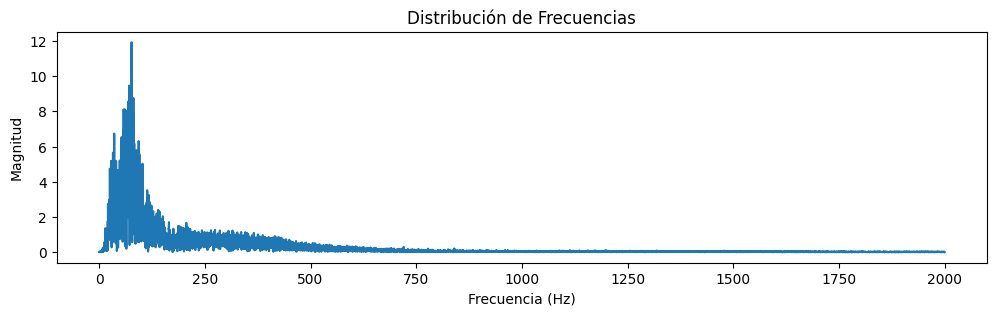

In [13]:
plot_waveform_and_spectrograms(mobile_snippet, sample_rate)
plot_audio_fft(mobile_snippet, sample_rate)

Audio(mobile_snippet, rate=sample_rate, autoplay=True)

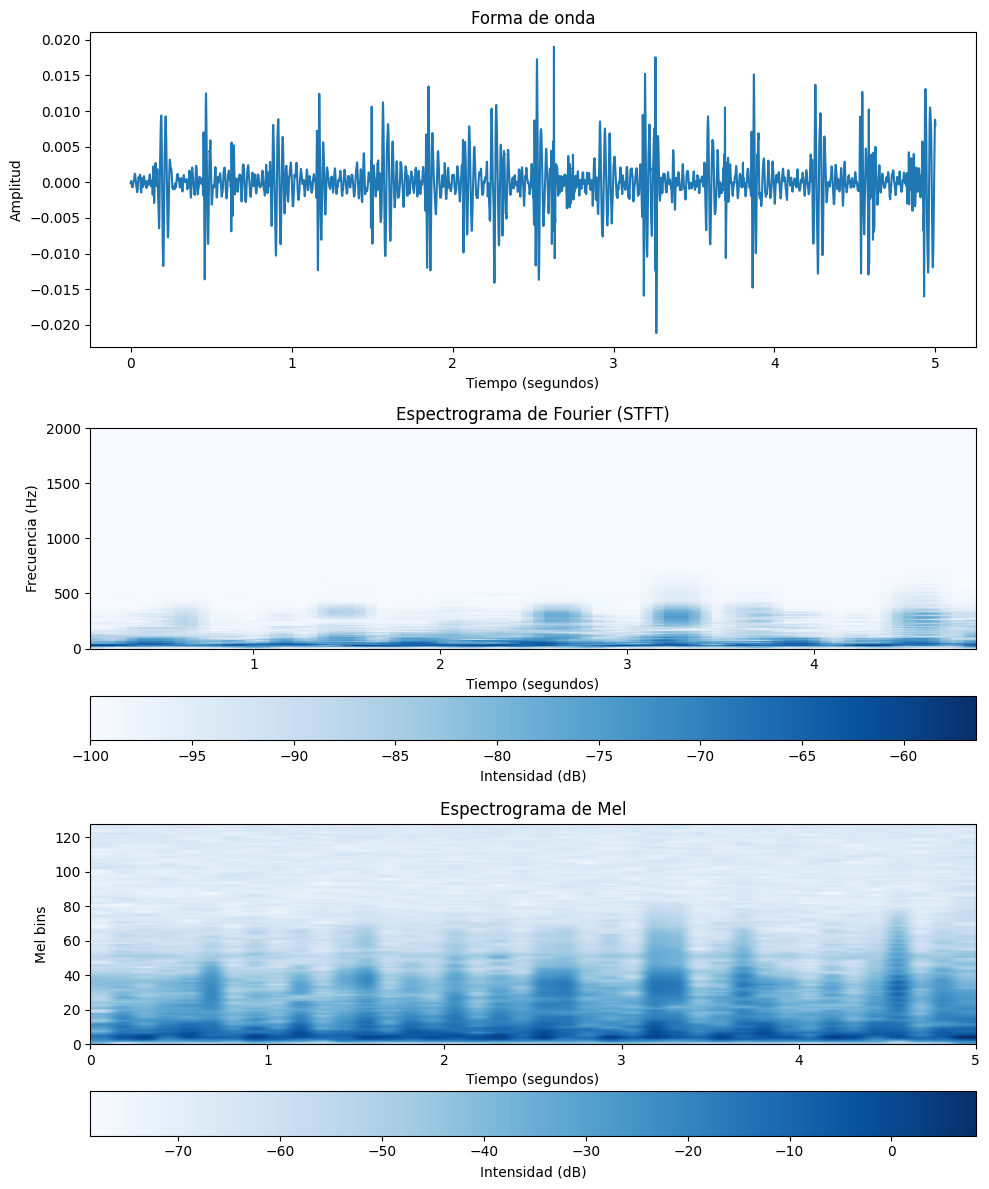

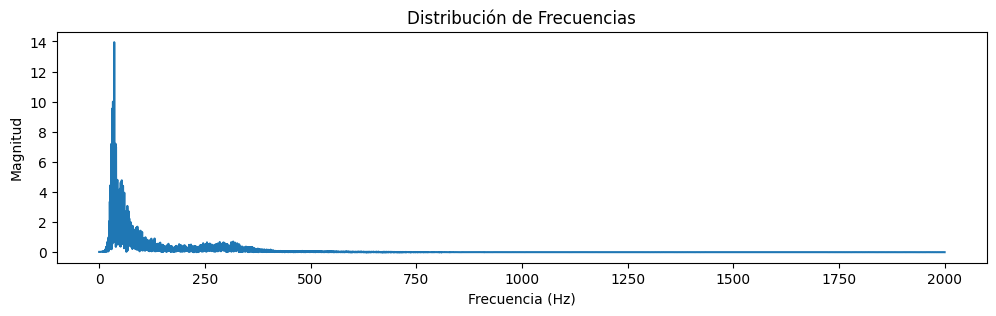

In [14]:
plot_waveform_and_spectrograms(stethos_snippet, sample_rate)
plot_audio_fft(stethos_snippet, sample_rate)

Audio(stethos_snippet, rate=sample_rate, autoplay=True)

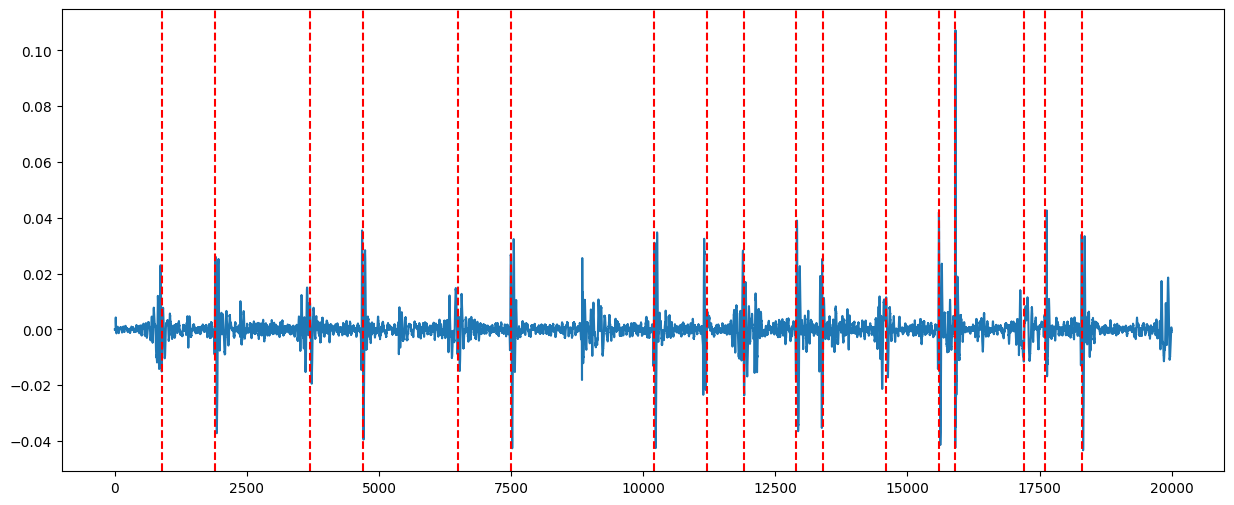

Peaks in real signal: [  900  1900  3700  4700  6500  7500 10200 11200 11900 12900 13400 14600
 15600 15900 17200 17600 18300]
Difference between each: [1000 1800 1000 1800 1000 2700 1000  700 1000  500 1200 1000  300 1300
  400  700]


In [15]:
DOWNSAMPLE_FACTOR = 100
PEAKS_HEIGHT = 0.4
PEAKS_PROMINENCE = 0.15

mobile_heartbeats = sam.find_heartbeats(
    mobile_snippet, DOWNSAMPLE_FACTOR, PEAKS_HEIGHT, PEAKS_PROMINENCE
)

plt.figure(figsize=(15, 6))
plt.plot(mobile_snippet.squeeze())

for peak in mobile_heartbeats:
    plt.axvline(x=peak, color="red", linestyle="--")

plt.show()

print(f"Peaks in real signal: {mobile_heartbeats}")
print(f"Difference between each: {np.diff(mobile_heartbeats)}")

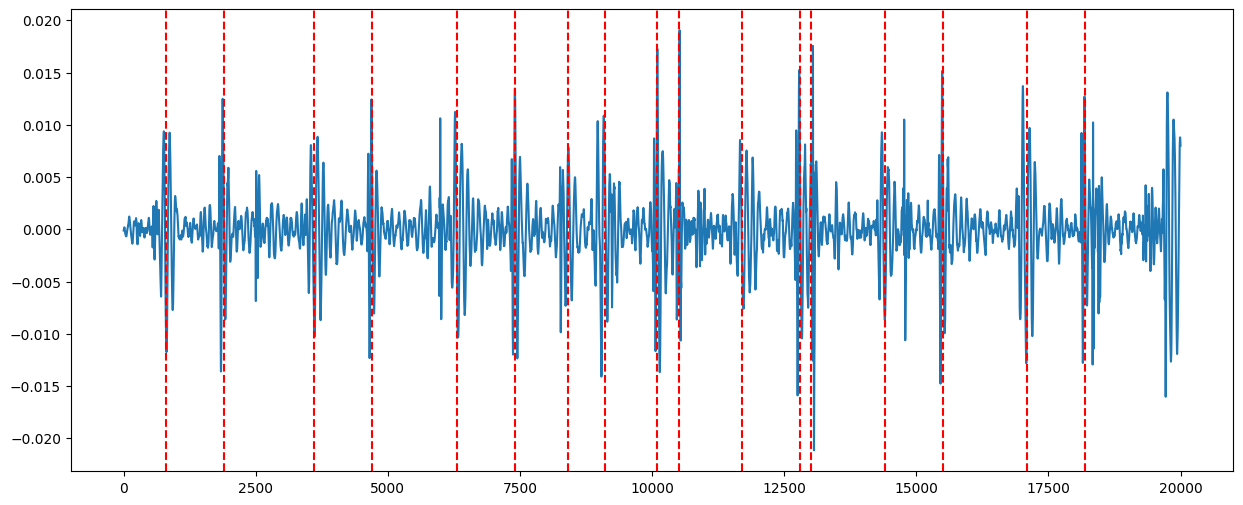

Peaks in real signal: [  800  1900  3600  4700  6300  7400  8400  9100 10100 10500 11700 12800
 13000 14400 15500 17100 18200]
Difference between each: [1100 1700 1100 1600 1100 1000  700 1000  400 1200 1100  200 1400 1100
 1600 1100]


In [16]:
stethos_heartbeats = sam.find_heartbeats(
    stethos_snippet, DOWNSAMPLE_FACTOR, PEAKS_HEIGHT, PEAKS_PROMINENCE
)

plt.figure(figsize=(15, 6))
plt.plot(stethos_snippet.squeeze())

for peak in stethos_heartbeats:
    plt.axvline(x=peak, color="red", linestyle="--")

plt.show()

print(f"Peaks in real signal: {stethos_heartbeats}")
print(f"Difference between each: {np.diff(stethos_heartbeats)}")